# SVM中使用多项式特征

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
X, y = datasets.make_moons(noise=0.15, random_state=666)# 生成数据的时候标准差增大

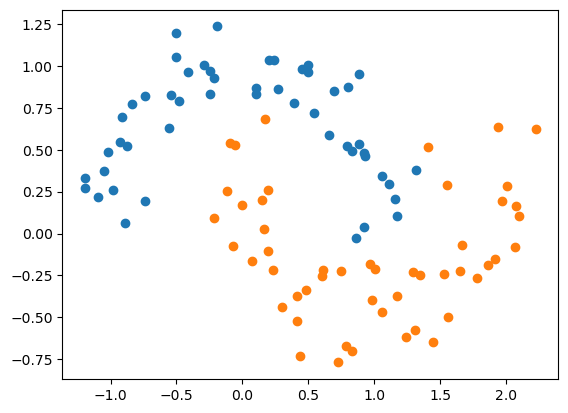

In [16]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [17]:
from sklearn.svm import LinearSVC

In [18]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

In [28]:
def PolynomialSVC(degree=2, C=1.0):
    return Pipeline([
        ("poly", PolynomialFeatures(degree = degree)),
        ("std_scaler", StandardScaler()), 
        ("linearsvc", LinearSVC(C = C))
    ])

In [37]:
polysvc = PolynomialSVC(3)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [39]:
polysvc.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('std_scaler', StandardScaler()), ('linearsvc', LinearSVC())])

In [40]:
polysvc.score(X_test, y_test)

0.88

In [41]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(-1, 1), 
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

Text(0.5, 1.0, 'With Polynomial featrues degree=3')

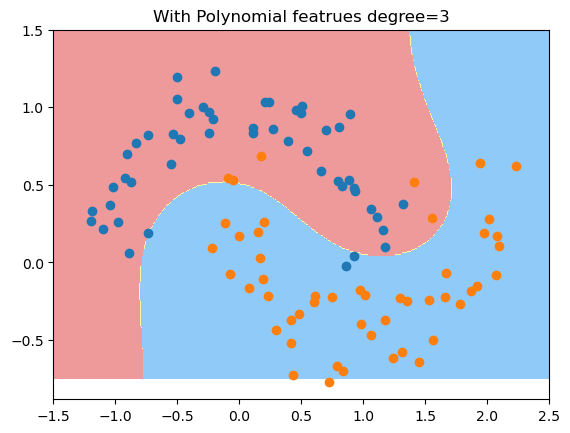

In [50]:
plot_decision_boundary(polysvc, [-1.5, 2.5, -0.75, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.title("With Polynomial featrues degree=3")

# 多项式核

In [44]:
from sklearn.svm import SVC
def PolynomialKernelSVC(degree, C=1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("kernelSVC", SVC(kernel='poly', degree=degree, C=C))
        
    ])

In [46]:
poly_kernel_svc = PolynomialKernelSVC(degree=3)

In [47]:
poly_kernel_svc.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('kernelSVC', SVC(kernel='poly'))])

Text(0.5, 1.0, 'With Polynomial kernel degree=3')

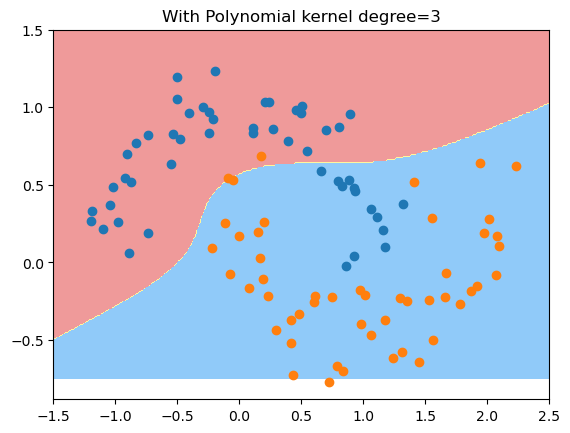

In [51]:
plot_decision_boundary(poly_kernel_svc, [-1.5, 2.5, -0.75, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.title("With Polynomial kernel degree=3")